In [2]:
import pandas as pd
import spacy
import numpy as np
import gensim
from gensim.models import Word2Vec
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
import codecs, json 
import nltk
nltk.download('punkt')
import numpy as np
import gensim.downloader as api
import json
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.models import load_model

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/apt/Models/word2vec_with_numbers')

In [4]:
data  = []
with open("/content/drive/MyDrive/Colab Notebooks/apt/word2vec_test_with_numbers.json", 'r') as f:
    data=json.load(f)
    with_numbers = pd.DataFrame(data)

query = np.array([np.array(list(np.float_(x))) for x in with_numbers['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in with_numbers['product_vector']])
test=np.concatenate((query, product), axis = 1)

predictionAll = model.predict(test)
predictionAll = np.array([i*4 for i in predictionAll])

In [5]:
from prettytable import PrettyTable
goodExamplesIndex=[4988, 1, 5001, 12, 5006, 35, 5011, 56, 5017, 61, 5018, 62, 5084, 75, 79, 80]
goodExamples=with_numbers.iloc[goodExamplesIndex]
query = np.array([np.array(list(np.float_(x))) for x in goodExamples['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in goodExamples['product_vector']])
testGood=np.concatenate((query, product), axis = 1)
predictionGood = model.predict(testGood)
predictionGood = np.array([i*4 for i in predictionGood])
c=0
t = PrettyTable(['prediction', 'query', 'product title', 'product description'])
t.align['query'] = "l"
t.align['product title'] = "l"
t.align['product description'] = "l"
for i, item in goodExamples.iterrows():
  t.add_row([predictionGood[c][0], item['queryOrig'], item['productTOrig'], str(item['productDOrig']).replace("\n", "\t").replace("nan", "")])
  c+=1
print(t)

+------------+---------------------------+---------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| prediction | query                     | product title                                                                   | product description                                                                                                                   

In [6]:
badExamplesIndex=[5003, 20, 5029, 31, 5059, 54, 5069, 58, 5089, 64, 5103, 74, 5107, 77, 90, 92, 94]
badExamples=with_numbers.iloc[badExamplesIndex]
query = np.array([np.array(list(np.float_(x))) for x in badExamples['query_vector']])
product = np.array([np.array(list(np.float_(x))) for x in badExamples['product_vector']])
testBad=np.concatenate((query, product), axis = 1)
predictionBad = model.predict(testBad)
predictionBad = np.array([i*4 for i in predictionBad])
c=0
t = PrettyTable(['prediction', 'query', 'product title', 'product description'])
t.align['query'] = "l"
t.align['product title'] = "l"
t.align['product description'] = "l"
for i, item in badExamples.iterrows():
  t.add_row([predictionBad[c][0], item['queryOrig'], item['productTOrig'], str(item['productDOrig']).replace("\n", "\t").replace("nan", "")])
  c+=1
print(t)

+------------+----------------------------+------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| prediction | query                      | product title                                                                                                          | product descripti

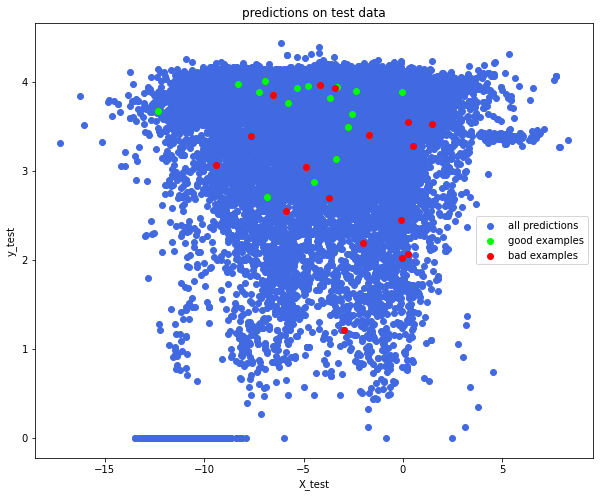

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
X_grid = np.arange(min(np.sum(test, axis=1)), max(np.sum(test, axis=1)), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(np.sum(test, axis=1), predictionAll, color = 'royalblue', label='all predictions')
plt.scatter(np.sum(testGood, axis=1), predictionGood, color = 'lime', label='good examples')
plt.scatter(np.sum(testBad, axis=1), predictionBad, color = 'red', label='bad examples')
plt.title('predictions on test data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend(loc="best")
plt.show()